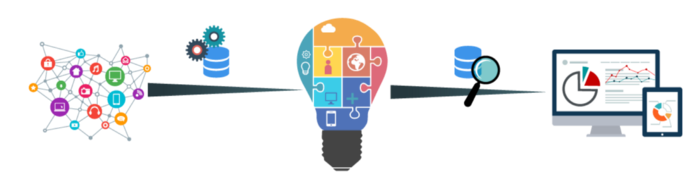

# Projeto Hashtag - Criação de um modelo de classificação <br>
### Contexto: Será realizado uma análise do conjunto de dados de classificações de plantas com diferentes tipos de Íris. Os dados utilizados são da biblioteca scikit-learn, através do link https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris <br>

#### Passo 1 - Importando as blibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
import pprint

#### Passo 2 - Importando a base de dados 
* pip install -U scikit-learn

In [2]:
# Importando o dataset iris
from sklearn.datasets import load_iris 

# Obtendo os dados do dataset
dados_iris = load_iris()
pprint.pprint(dados_iris)
# type(dados_iris.data_module)

{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 150 (50 in each of three classes)\n'
          '    :Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          '    :Attribute Information:\n'
          '        - sepal length in cm\n'
          '        - sepal width in cm\n'
          '        - petal length in cm\n'
          '        - petal width in cm\n'
          '        - class:\n'
          '                - Iris-Setosa\n'
          '                - Iris-Versicolour\n'
          '                - Iris-Virginica\n'
          '                \n'
          '    :Summary Statistics:\n'
          '\n'
          '    ============== ==== ==== ======= ===== ====================\n'
          '                    Min  Max   Mean    SD   Class Correlation\n'
          '  

##### Analisando os dados do datasets íris:
* data (dados) é um array com os valores das observações (Valores das linhas)
* target (destino/alvo/objetivo) é um array com os valores da classificação das flores
* frame está vazio
* target_names (nomes de destino/alvo/objetivo) é um array com os nomes da classificação das flores → (['setosa', 'versicolor', 'virginica'])
* DESCR é uma string (Descrição do conjunto de dados)
* feature_names (nomes de recursos) é uma lista com os valores dos atributos (Valores das colunas) → ['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)']
* filename (nome do arquivo) é uma string → 'iris.csv'
* data_module (módulo de dados) é uma string → 'sklearn.datasets.data'

In [3]:
df_iris = pd.DataFrame(dados_iris.data) # Transformando os dados_iris em um DataFrame
df_iris.columns = dados_iris.feature_names # Adicionando os nomes das colunas utilizando os nomes feature_names
df_iris['Target'] = dados_iris.target # Adicionando a coluna Target ao DataFrame utilizando os valores da classificação das flores
df_iris['Nome Target'] = dados_iris.target # Adicionando a coluna Nome Target ao DataFrame utilizando os nomes da classificação das flores
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Nome Target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [4]:
df_iris['Nome Target'].value_counts()

0    50
1    50
2    50
Name: Nome Target, dtype: int64

In [5]:
df_iris['Nome Target'] = df_iris['Nome Target'].replace(0, "setosa")
df_iris['Nome Target'] = df_iris['Nome Target'].replace(1, "versicolor")
df_iris['Nome Target'] = df_iris['Nome Target'].replace(2, "virginica")

#### Passo 3 - Visualizando os dados e as informações dos dados

In [6]:
display(df_iris.head())
df_iris.info()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Nome Target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
 5   Nome Target        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


#### Passo 4 - Excluindo as observações cujo o target  seja igual a 2 (virginica)
* Para este projeto iremos considerar apenas os Target = 0 e Target = 1

In [7]:
df_iris = df_iris[df_iris.Target != 2]

In [8]:
display(df_iris.head())
df_iris.info()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Nome Target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   Target             100 non-null    int32  
 5   Nome Target        100 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 5.1+ KB


#### Passo 5 - Visualizando as informações estatísticas descritivas

In [9]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


#### Passo 6 - Visualizando todas as variaveis utilizando gráficos

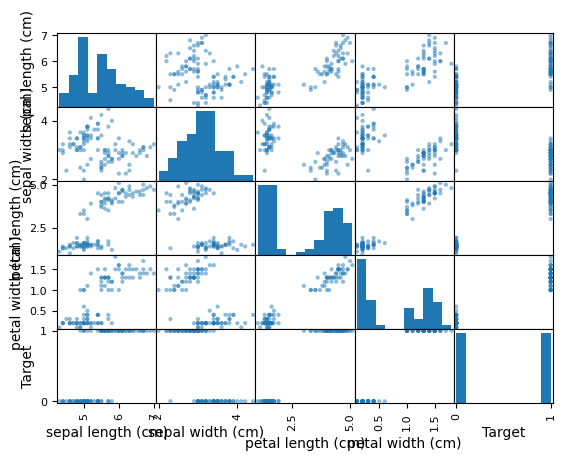

In [10]:
pd.plotting.scatter_matrix(df_iris);

##### A utilizar a função de plotagem do pandas (pd.plotting) para todas as variáveis, a visualização dos dados como matriz de dispersão ficou visivilmente ruim, por tanto, utilizaremos a biblioteca do Seaborn.
* Documentação da biblioteca: https://seaborn.pydata.org/index.html
* Utilizaremos o módulo pairplot: Que trace relacionamentos de pares em um conjunto de dados.

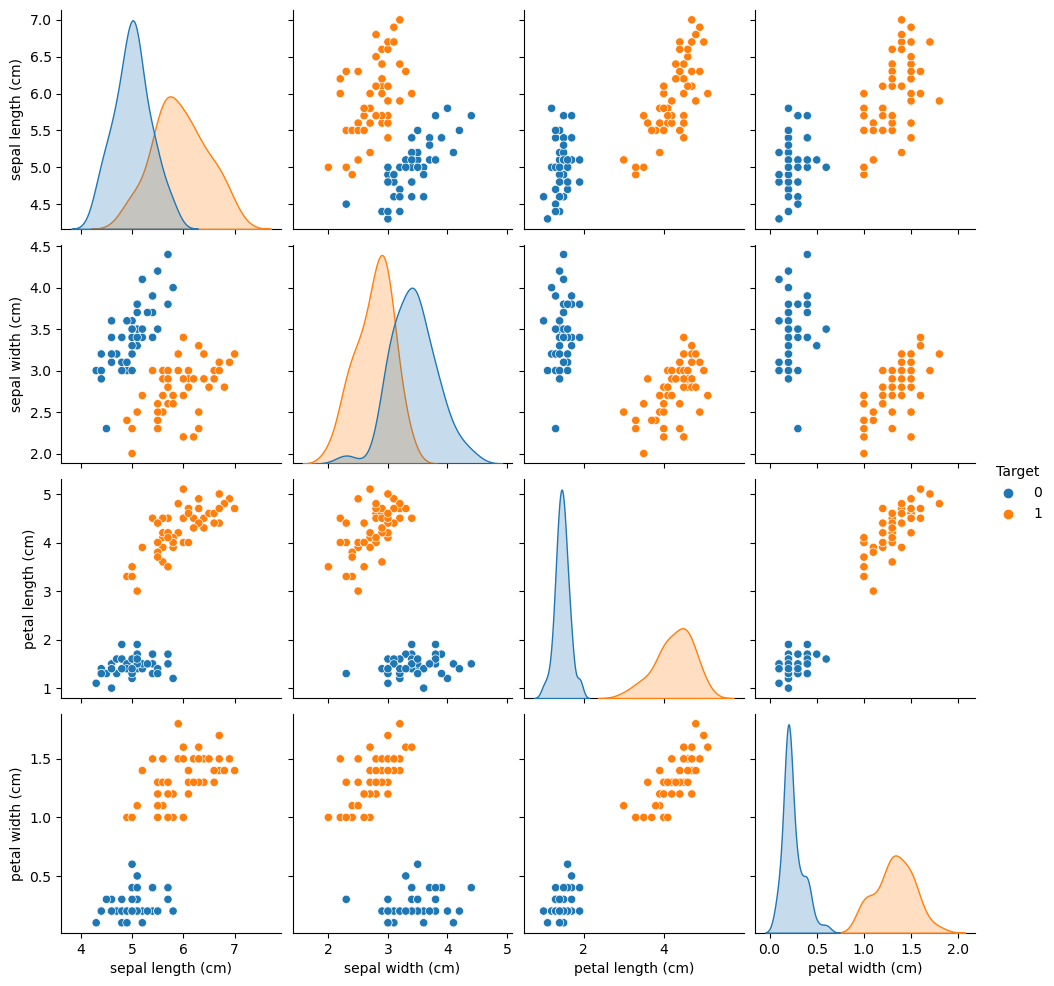

In [11]:
sns.pairplot(df_iris,hue="Target");
# hue = Parametro que mapear aspectos do gráfico para cores diferentes.

##### Analisando todos os gráficos, conseguimos facilmente traçar uma reta que separaria a variável petal lenght da variável petal width

#### Passo 7 - Construindo o gráfico de dispersão com os valores das variáveis petal lenght  e petal width
* Sugestão de cor: PiYG → https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

<br>

1. Definindo o tamanho da figura onde ficaram os gráficos 
        
        fig, ax = plt.subplots()

<br>

2. Definindo o tipo de gráfico e os valores dos eixo X e Y 

        x = df_iris["petal length (cm)"]
        y = df_iris["petal width (cm)"]
        ax.scatter(X,Y, parâmetros) → ax.scatter(x,y,c=iris.Target,cmap='PiYG')
* c = semelhante a uma matriz ou lista de cores ou cores
* cmap = A instância do Colormap ou o nome do mapa de cores registrado usado para mapear dados escalares para cores.

<br>

3. Criando a reta para separar as duas variáveis (petal length e petal width)

        x_reta = [1,3] (Valores escolhidos de forma manual)
        y_reta = [2,0] (Valores escolhidos de forma manual)
        ax.plot(x_reta,y_reta,c='b')
        

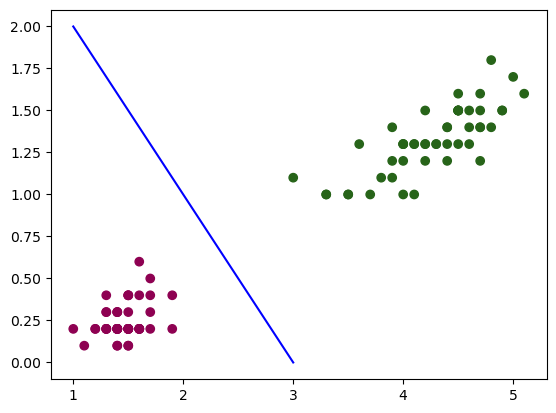

In [12]:
# Traçando um scatter do matplotlib das colunas "petal length (cm)" e "petal width (cm)"
fig, ax = plt.subplots()

# Atribuindo os valores de x e y para o gráfico de dispersão
x = df_iris["petal length (cm)"]
y = df_iris["petal width (cm)"]
ax.scatter(x,y,c=df_iris.Target,cmap='PiYG')

# Gráfico de linha para criar uma reta para separar os dados
x_reta = [1,3]
y_reta = [2,0]
ax.plot(x_reta,y_reta,c='b')

plt.show();

##### Analisando os valores escolhidos de forma manual para criação da reta: <br>
##### Equação da reta: y = ax + b
##### Qual seria a equação da reta para a reta criada? 
    x_reta = [1,3] 
    y_reta = [2,0]

<br> 

* x = 1 e y = 2 → Equação 1: 2 = a * 1 + b 
* x = 3 e y = 0 → Equação 2: 0 = a * 3 + b 
* Unindo as duas equações: (2 = a * 1 + b) - (0 = x * 3 + b) → 2 = a * (-2) → Equação: 2 = -2a    

<br>

##### Calculando os valores de a e b:
* 2 = -2a → a = 2/-2 → a = -1 
* Equação 1: 2 = a * 1 + b → 2 = (-1) * 1 + b → b = 2 + 1 → b = 3 
* Equação 2: 0 = a * 3 + b → 0 = (-1) * 3 + b → 0 = (-3) + b → b = 3

<br> 

##### Equação da reta: y = ax + b, sendo a = -1 e b = 3, temos: y = -1 x + 3 <br>

##### Utilizando a equação da reta encontrada, podemos determinar em qual região qualquer ponto vai estar, basta substituirmos o x do ponto:
* Se y do ponto > y da equação, esse ponto vai ser classificado como 1
* Se y do ponto < y da equação, esse ponto vai ser classificado como 0

<br>

##### Exemplos: <br>
##### 1 - Um ponto localizado na seguinte posição → x = 3,5 e y = 0,7
##### y = -1 x + 3 → y = (-1) * 3,5 + 3 → y = -0,5
##### y do ponto = 0,7 > y da equação = -0,5, por tanto, esse ponto será classificado como 1 (Target = 1)

<br>

##### 2 - Um ponto localizado na seguinte posição → x = 2,0 e y = 0,6 
##### y = -1 x + 3 → y = (-1) * 2,0 + 3 →  y = 1
##### y do ponto = 0,6 < y da equação = 1, por tanto, esse ponto será classificado como 0 (Target = 0)

##### Visualizando onde os pontos ficariam localizados no gráfico de dispersão
1. Um ponto localizado na seguinte posição → x = 3,5 e y = 0,7 → Com a cor vermelha
2. Um ponto localizado na seguinte posição → x = 2,0 e y = 0,6 → Com a cor amarela

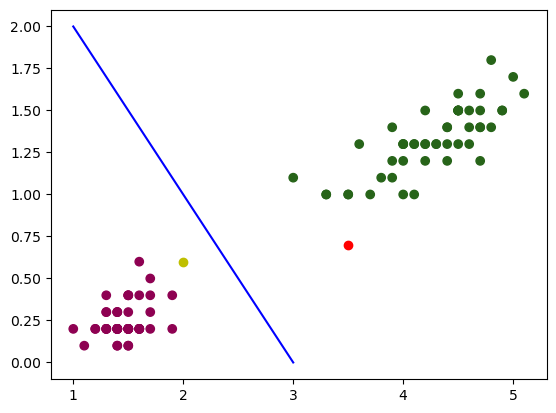

In [13]:
# Traçando um scatter do matplotlib das colunas "petal length (cm)" e "petal width (cm)"
fig, ax = plt.subplots()

# Atribuindo os valores de x e y para o gráfico de dispersão
x = df_iris["petal length (cm)"]
y = df_iris["petal width (cm)"]
ax.scatter(x,y,c=df_iris.Target,cmap='PiYG')

# Gráfico de linha para criar uma reta para separar os dados
x_reta = [1,3]
y_reta = [2,0]
ax.plot(x_reta,y_reta,c='b')

# Fazendo o gráfico de dispersão para os pontos dos exemplos 
ax.scatter(x=3.5,y=0.7,c="r") # Target = 1
ax.scatter(x=2,y=0.6,c="y") # Target = 0

plt.show();

##### Criando uma função para classificar um novo ponto no modelo cuja a equação da reta seja y = -1 x + 3 
* Target = 1 (Acima da reta) 
* Target = 0 (Abaixo da reta)

In [14]:
def classifica_modelo(x,y):
    y_equacao = -x + 3 # Equação da reta do modelo → y = -1 x + 3
    y_ponto = y
    
    if y_ponto > y_equacao:
        return 1
    elif y_ponto < y_equacao:
        return 0
    else:
        return -1

In [15]:
classifica_modelo(3.5,0.7)
# Ou seja, a classificação do ponto localizado em x = 3,5 e y = 0,7 será igual a 1 → Target = 1 (Acima da reta)

1

In [16]:
classifica_modelo(2,0.6)
# Ou seja, a classificação do ponto localizado em x = 2,0 e y = 0,6 será igual a 0 → Target = 0 (Abaixo da reta)

0

#### Passo 8 - Criando o modelo de Machine Learning para classificar melhor os pontos

##### Utilizaremos o classificador linear Perceptron dos modelos lineares da biblioteca scikit-learn para descobrir a melhor equação da reta que separa os pontos.

> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron <br>

In [17]:
modelo_clf = Perceptron(tol=1e-3, random_state=0)

##### a) Selecionando o X e o y

In [18]:
X = df_iris[['petal length (cm)','petal width (cm)']]
y = df_iris.Target

##### b) Fazendo o fit do modelo
* Ajusta os valores de x e y para o modelo criar o coeficiente angular (W0), coeficiente linear (W1, W2, W3, ...) e os limites para conseguir classificar os valores como 1 ou 0

In [19]:
# Fazendo o fit com o modelo
modelo_clf.fit(X, y)

Perceptron()

##### c) Gerando o coeficiente angular
* O coeficiente angular "a" é o número que acompanha a variável "x" na equação da reta. Ele indica a inclinação da reta em relação ao eixo x.
* Atributo coef_: Pesos atribuídos aos recursos.
* w1 = modelo_clf.coef_[0][0]
* w2 = modelo_clf.coef_[0][1]

In [20]:
# w1 e w2
modelo_clf.coef_

# w1 = modelo_clf.coef_[0][0] = 0.9
# w2 = modelo_clf.coef_[0][1] = 1.7

array([[0.9, 1.7]])

##### d) Gerando o coeficiente linear
* O coeficiente linear é representado pelo valor 'b' na equação da reta.
* Atributos intercept_: Constantes na função de decisão.

In [21]:
# w0
modelo_clf.intercept_

array([-3.])

##### e) Utilização dos dois coeficientes para calcular a equação da reta
* mod_x = np.arange(1,6)
* mod_y = w0 + w1.x + w2.y = 0, sendo x = "petal length" e y = "petal width"
        
        w0 + w1.x + w2.y = 0
        w2.y = - w0 - w1.x
        y = (- w0 - w1.x) / w2
        y = (- modelo_clf.intercept_ - modelo_clf.coef_[0][0].x)/modelo_clf.coef_[0][1]

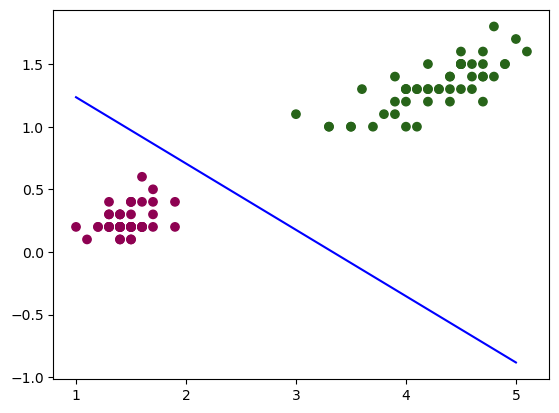

In [22]:
# Traçando um scatter do matplotlib das colunas "petal length (cm)" e "petal width (cm)"
fig, ax = plt.subplots()

# Atribuindo os valores de x e y para o gráfico de dispersão
x = df_iris["petal length (cm)"]
y = df_iris["petal width (cm)"]
ax.scatter(x,y,c=df_iris.Target,cmap='PiYG')

# Gráfico de linha para criar uma reta para separar os dados
mod_x = np.arange(1,6)
mod_y = (- modelo_clf.intercept_ - modelo_clf.coef_[0][0]*mod_x)/modelo_clf.coef_[0][1]
ax.plot(mod_x,mod_y,c='b')

plt.show();

#### Extra: Avaliando utilizando o modelo de árvore de decisão: 
##### Importando o dataset Iris novamente e excluindo as observações cujo o target seja = 0

In [23]:
# Importando o dataset iris
from sklearn.datasets import load_iris 

# Obtendo os dados do dataset
dados_iris = load_iris()

df_iris = pd.DataFrame(dados_iris.data) # Transformando os dados_iris em um DataFrame
df_iris.columns = dados_iris.feature_names # Adicionando os nomes das colunas utilizando os nomes feature_names
df_iris['Target'] = dados_iris.target # Adicionando a coluna Target ao DataFrame utilizando os valores da classificação das flores
df_iris = df_iris[df_iris.Target != 0] # Excluindo as observações cujo o target seja igual a 0 (setosa)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


##### Separando os dados

In [24]:
# Separando os valores do x e y
X = df_iris.drop('Target',axis=1)
y = df_iris.Target

In [25]:
# Separando os dados em teste e treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

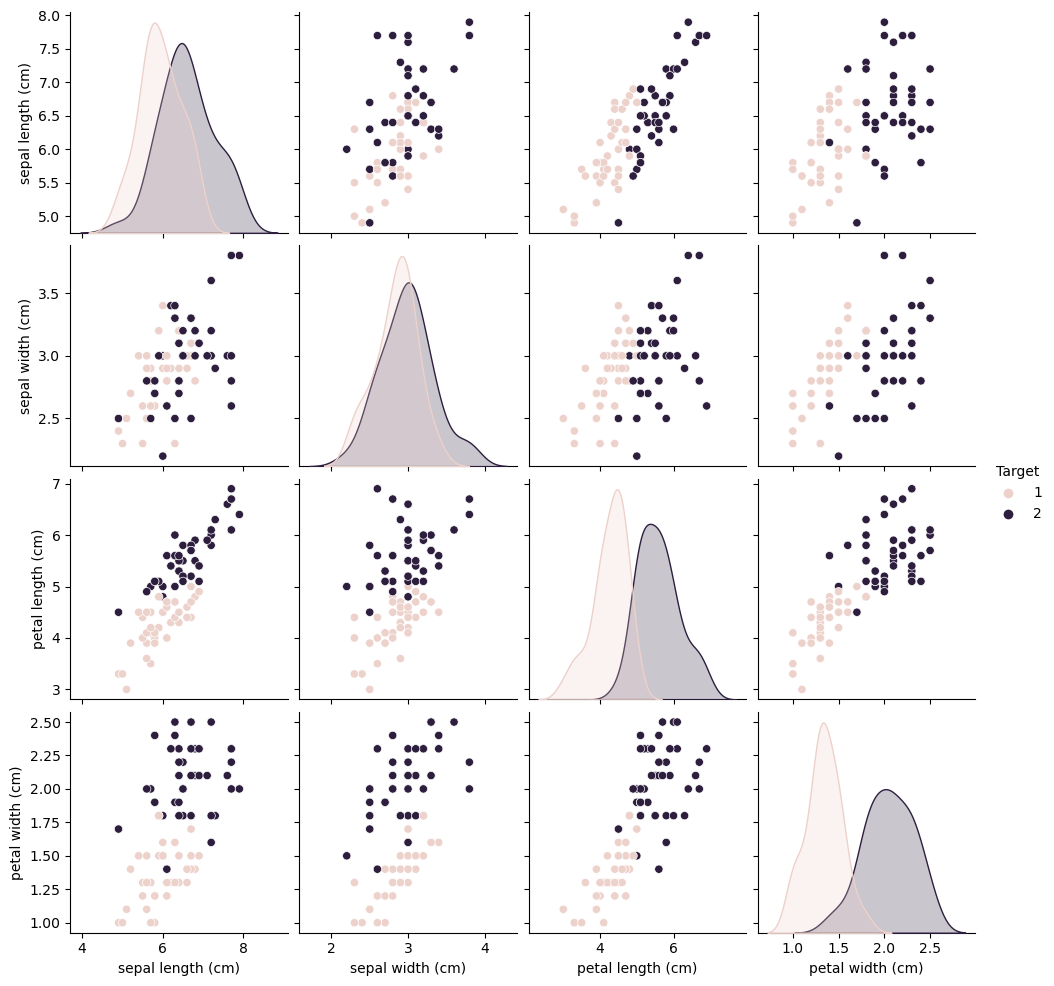

In [26]:
# Visualizando todos os dados
X_visualizar = pd.concat([X_train,y_train],axis=1)
sns.pairplot(X_visualizar,hue='Target');

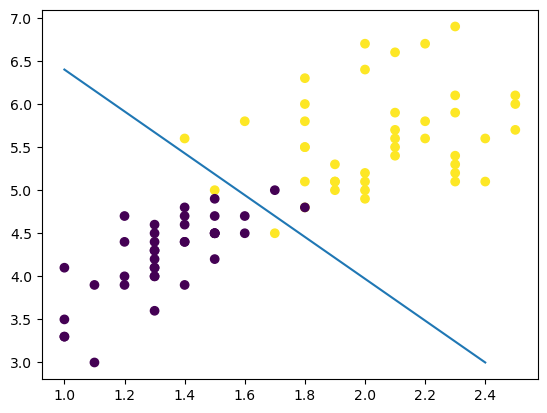

In [27]:
# 1 - Analisando as visualizações, escolhemos as variáveis: petal width e petal length   
# 2 - Plotando o gráfico de dispersão: Petal width x Petal length

# plot
fig, ax = plt.subplots()

ax.scatter(X_train['petal width (cm)'], X_train['petal length (cm)'], c=y_train.values)

# Criar o plot de uma reta
x_reta = [2.4,1]
y_reta = [3,6.4]
ax.plot(x_reta,y_reta)

plt.show()

(x = 2.4, y = 3) → y = ax + b → 3 = a * 2.4 + b <br>
(x = 1, y = 6.4) → y = ax + b → 6.4 = a * 1 + b <br>

<br>

(3 = a * 2.4 + b) - (6.4 = a * 1 + b) → <br>
3 - 6.4 = (2.4 a - 1 a) + (b-b) → <br>
-3.4 = 1.4 a → <br>
a = -3.4 / 1.4 → a = -1.7 / 0.7 <br>

<br>

3 = a * 2.4 + b <br>
3 - (a * 2.4) = b <br>
b = 3 - 2.4 a <br>

In [28]:
def Classifica_modelo_reta(x,y):
    # y = ax + b
    y_modelo = a*x + b
    
    # Se y_ponto > y_funcao: class 2
    if y >= y_modelo:
        return 2
    # Se y_ponto < y_funcao: class 1
    elif y < y_modelo:
        return 1

* Petal width >= 1.9 → classificação = 2
* Petal width <= 1.3 → classificação = 1
* Petal length <= 5 e Petal width entre 1.3 e 1.9 → classificação = 1
* Petal length > 5 e Petal width entre 1.3 e 1.9 → classificação = 2    

In [29]:
def Classifica_modelo_arvore(x,y):
    if x >= 1.9:
        return 2
    elif x <= 1.3:
        return 1
    elif y <= 5:
        return 1
    elif y > 5:
        return 2

In [30]:
# Aplicando a função nos dados de treino e teste
a = -1.7 / 0.7
b = 3 - 2.4 * a

# Dados de treino
y_modelo_reta_treino = X_train.apply(lambda x:Classifica_modelo_reta(x['petal width (cm)'],x['petal length (cm)']),axis=1)
y_modelo_arvore_treino = X_train.apply(lambda x:Classifica_modelo_arvore(x['petal width (cm)'],x['petal length (cm)']),axis=1)

# Dados de teste
y_modelo_reta_teste = X_test.apply(lambda x:Classifica_modelo_reta(x['petal width (cm)'],x['petal length (cm)']),axis=1)
y_modelo_arvore_teste = X_test.apply(lambda x:Classifica_modelo_arvore(x['petal width (cm)'],x['petal length (cm)']),axis=1)

In [31]:
# Para a reta
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_modelo_reta_teste)

array([[11,  1],
       [ 1,  7]], dtype=int64)

In [32]:
# Para a árvore                                                 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_modelo_arvore_teste)

array([[11,  1],
       [ 3,  5]], dtype=int64)

In [33]:
# Acurácia: Para a reta
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_modelo_reta_teste)

0.9

In [34]:
# Acurácia: Para a árvore
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_modelo_arvore_teste)

0.8

In [35]:
# Precisão: Para a reta
from sklearn.metrics import precision_score
precision_score(y_test, y_modelo_reta_teste,pos_label=2)

0.875

In [36]:
# Precisão: Para a árvore
from sklearn.metrics import precision_score
precision_score(y_test, y_modelo_arvore_teste,pos_label=2)

0.8333333333333334

In [37]:
# Recall: Para a reta
from sklearn.metrics import recall_score
recall_score(y_test, y_modelo_reta_teste,pos_label=2)

0.875

In [38]:
# Recall: Para a árvore
from sklearn.metrics import recall_score
recall_score(y_test, y_modelo_arvore_teste,pos_label=2)

0.625